In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [2]:
# Read data from CSV and remove unnecessary columns
cna31 = pd.read_csv('../data/CNA31-PopPerYearByBirthplace.csv')
cna31.drop(columns=['Statistic', 'County', 'UNIT'], inplace=True)
cna31.head()

,Year,Northern Ireland,Great Britain,U.S.A.,Other Countries
0,1841,24295,22625,1502,2048
1,1851,32763,34217,1622,6167
2,1861,30153,53305,2671,5537
3,1871,33870,67370,3044,10949
4,1881,32887,67577,5088,10467


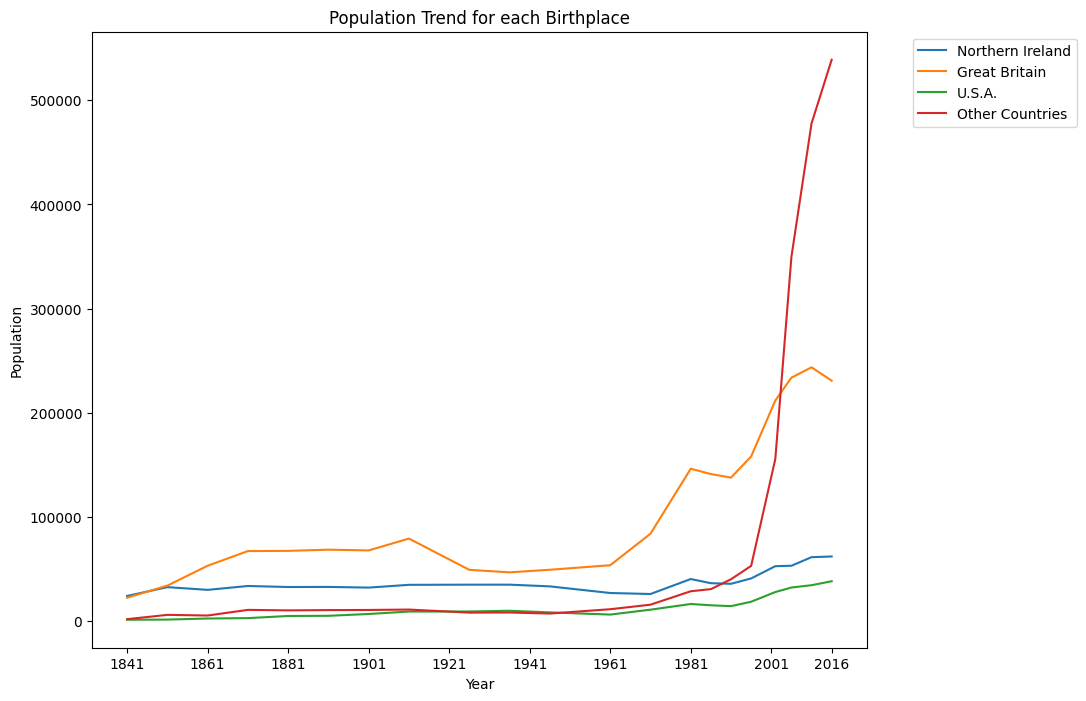

In [3]:
# Data Visualisation

# Visualising population trend for each birthplace
plt.figure(figsize=(10, 8))

# Plotting population by birthplace
for column in cna31.columns[1:]:
    plt.plot(cna31['Year'], cna31[column], label=column)

# Custom tick labels to show every 20th year and the final year
x_ticks = [1841, 1861, 1881, 1901, 1921, 1941, 1961, 1981, 2001, 2016]
plt.xticks(x_ticks)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend for each Birthplace')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [4]:
# Linear Regression for Other Countries
print('Performing Linear Regression for Other Countries using every data point')
X = cna31[['Year']]
y = cna31['Other Countries']

model = LinearRegression()
model.fit(X, y)

print('R-squared:', model.score(X, y))
y_pred = model.predict(X)
print('RMSE:', root_mean_squared_error(y, y_pred))

Performing Linear Regression for Other Countries using every data point
R-squared: 0.3615753029720815
RMSE: 125631.06348580658


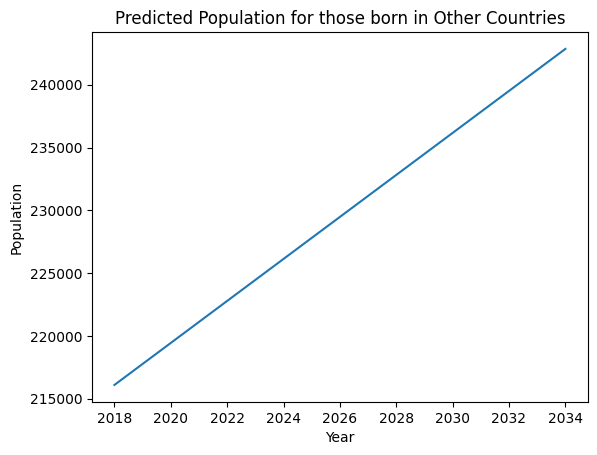

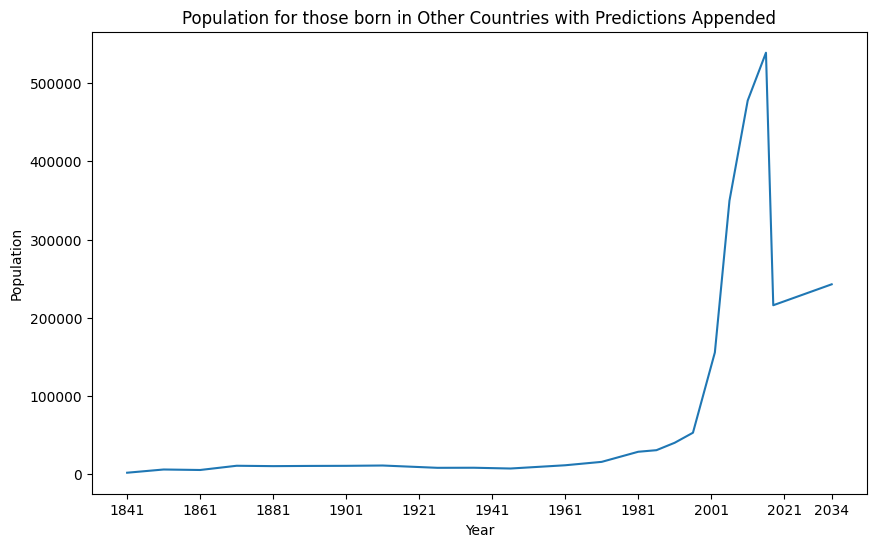

In [5]:
# Plotting predicted future population trend for people born in Other Countries
years_to_predict = pd.DataFrame({'Year': [2018, 2020, 2022, 2024, 2026, 2028, 2030, 2032, 2034]})
predictions = model.predict(years_to_predict)

plt.plot(years_to_predict['Year'], predictions)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population for those born in Other Countries')
plt.show()

cna31_with_preds = np.append(np.asarray(cna31['Other Countries']), np.asarray(predictions))
years = np.append(np.asarray(cna31['Year']), np.asarray(years_to_predict['Year']))

plt.figure(figsize=(10, 6))
plt.plot(years, cna31_with_preds)
x_ticks[-1:] = [2021]
x_ticks += [2034]
plt.xticks(x_ticks)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population for those born in Other Countries with Predictions Appended')
plt.show()

In [6]:
# Linear Regression for Other Countries using only the last 5 datapoints when a noticeable shift happens
print('Performing Linear Regression for Other Countries only the last 5 datapoints')
X = cna31[['Year']][-5:]
y = cna31['Other Countries'][-5:]

model = LinearRegression()
model.fit(X, y)

print('R-squared:', model.score(X, y))
y_pred = model.predict(X)
print('RMSE:', root_mean_squared_error(y, y_pred))

Performing Linear Regression for Other Countries only the last 5 datapoints
R-squared: 0.9621460537870534
RMSE: 36055.52385196722


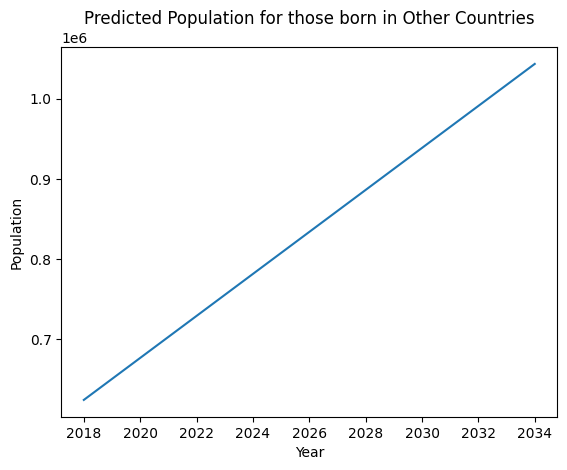

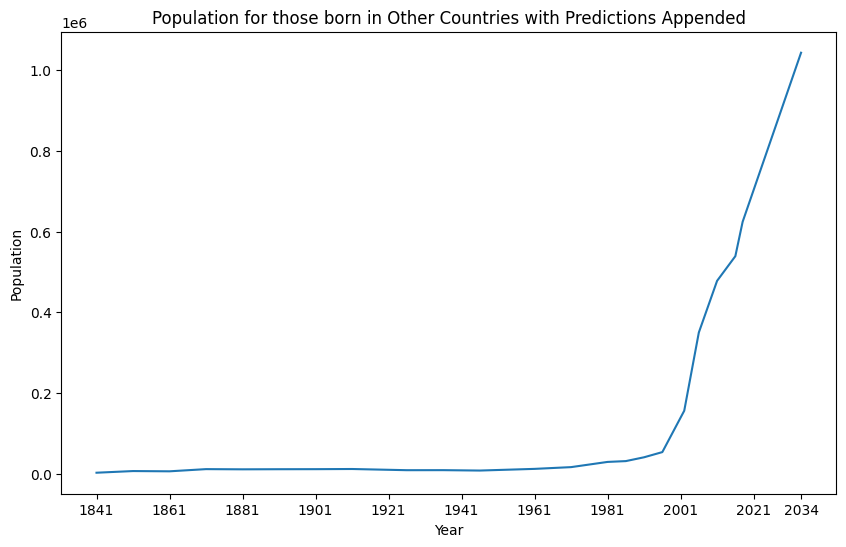

In [7]:
# Plotting predicted future population trend for people born in Other Countries
predictions = model.predict(years_to_predict)

plt.plot(years_to_predict['Year'], predictions)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population for those born in Other Countries')
plt.show()

cna31_with_preds = np.append(np.asarray(cna31['Other Countries']), np.asarray(predictions))

plt.figure(figsize=(10, 6))
plt.plot(years, cna31_with_preds)
plt.xticks(x_ticks)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population for those born in Other Countries with Predictions Appended')
plt.show()